# First case: Using counts matrix as input for creating co-expression network
### The input in this case should be a tab-separated matrix with observations as columns and variables as rows. In other words, in the rows should be the entities that will be the nodes of our network. 

In [1]:
import pandas as pd

### Let's import FAVA
#### Make sure you have loaded the latest version. If you are not sure visit here: https://pypi.org/project/favapy/

In [2]:
# !pip install favapy
from favapy import fava

### Our data is a single-cell RNAseq dataset. 

In [3]:
data = pd.read_csv("data/Example_dataset_GSE75748_sc_cell_type_ec.tsv", 
                   sep='\t') 

### Our matrix looks like this:

In [4]:
data

,H1_Exp1.001,H1_Exp1.002,H1_Exp1.003,H1_Exp1.004,H1_Exp1.006,H1_Exp1.007,H1_Exp1.008,H1_Exp1.009,H1_Exp1.010,H1_Exp1.011,...,TB_Batch2.135,TB_Batch2.136,TB_Batch2.137,TB_Batch2.138,TB_Batch2.139,TB_Batch2.140,TB_Batch2.141,TB_Batch2.142,TB_Batch2.143,TB_Batch2.144
MKL2,10.00,162.00,3.00,42.00,0.00,2.00,18.00,0.00,182.00,2.00,...,364.98,1.00,21.00,1127.80,2119.00,5.00,500.96,18.00,472.08,350.00
CD109,6.38,2.62,166.80,9.68,7.32,53.89,4.63,64.54,29.93,12.10,...,15.22,38.66,38.56,11.53,48.21,23.88,362.56,22.72,36.62,25.78
ABTB1,0.00,28.00,0.00,1.00,0.00,9.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,39.00,0.00
MAST2,0.00,133.00,41.00,0.00,0.00,2.00,0.00,0.00,0.00,8.00,...,175.00,41.00,32.00,3.00,6.00,206.00,43.04,2.00,1.00,99.00
KAT5,0.00,7.06,52.95,20.16,0.00,6.29,0.00,0.00,103.00,122.46,...,0.00,577.91,0.00,3.00,2.00,0.00,56.77,2.04,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDR33,101.00,201.44,23.31,164.65,181.49,135.93,233.00,105.00,215.98,371.10,...,512.80,9.86,776.49,1683.81,366.29,5.24,79.92,6.71,124.06,60.45
EPSTI1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,455.00,330.24,290.00,523.00,242.00,146.00,539.00,0.00,21.32,472.01
CLPTM1L,22.00,84.46,19.00,52.00,2.00,24.00,109.00,13.00,11.00,4.00,...,268.00,37.00,12.00,0.00,0.00,0.00,296.00,0.00,271.00,0.00
CCDC125,32.57,52.04,110.97,73.82,53.15,79.23,27.85,54.49,106.26,69.77,...,276.59,244.83,246.80,167.79,336.73,221.86,166.23,131.41,730.10,297.28


### Run FAVA

In [ ]:
my_FAVAourite_network = fava.cook(data = data,
                                  log2_normalization = True, # If your data are normalized set this to False
                                  hidden_layer = None, # If None, it will be adjusted base on the input size.
                                  latent_dim = None, # If None, it will be adjusted base on the size of the hidden layer.
                                  epochs = 50, 
                                  batch_size = 32,
                                  PCC_cutoff = 0.95) # This is arbitraty. We need to plot the score distribution.
my_FAVAourite_network
    

# Second case: Using anndata as input for creating co-expression network

### If input is an AnnData object, it contains an expression matrix X, which stores n_obs observations (cells) of n_vars variables (genes).

#### Here we follow the steps as described in the scanpy tutorial here: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [ ]:
# !mkdir data
# !wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# !cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz


In [5]:
import scanpy as sc

adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

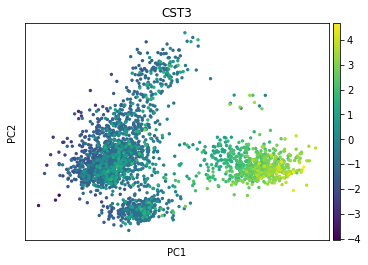

In [6]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Filtering
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')


In [7]:
print(adata)
print(adata.X)

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
[[-6.12200936e-03 -1.48024922e-03 -2.13638437e-03 ... -4.51365160e-03
  -6.40674978e-02 -3.70223857e-02]
 [-9.40247439e-03 -1.55478332e-03 -1.05254687e-02 ... -1.18392045e-02
  -1.09831728e-01 -6.34919181e-02]
 [-5.42712444e-03 -2.48085614e-03 -5.94359590e-03 ... -7.02461973e-03
  -8.56298953e-02 -5.57584986e-02]
 ...
 [-4.73570684e-03 -1.70380529e-03  7.48216098e-06 ... -2.43741483e-03
  -5.25713079e-02 -3.19451652e-02]
 [-3.90673382e-03 -1.65717863e-03  2.28009513e-03 ...  2.37765670e+00
  -4.01520319e-02 -2.45906953e-02]
 [-4.08808235e-03 -2.32962915e-03 -1.85557234e-03 ... -3.55155533e-03
  -6.32345751e-02 -4.20607105e-02]]


##### If the data is in Compressed Sparse Row format so we have to "uncompress" --> adata.X = adata.X.A

### Run FAVA

In [ ]:
my_FAVAourite_network = fava.cook(data = adata,
                                  log2_normalization = True, # If your data are normalized set this to False
                                  hidden_layer = None, # If None, it will be adjusted base on the input size.
                                  latent_dim = None, # If None, it will be adjusted base on the size of the hidden layer.
                                  epochs = 10, 
                                  batch_size = 100,
                                  PCC_cutoff = 0.95) # This is arbitraty. We need to plot the score distribution.
my_FAVAourite_network

### Now we have our network! Here we remove the AB-BA interactions (keeping only AB)

In [ ]:
my_FAVAourite_network_single = my_FAVAourite_network.iloc[::2, :]
my_FAVAourite_network_single


### Visualization of the network

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(my_FAVAourite_network_single,
                           source = 'Protein_1',
                           target = 'Protein_2',
                           edge_attr = 'Score')

In [ ]:
nx.draw_kamada_kawai(G, node_size = 50, node_color="purple")

In [ ]:
from pyvis.network import Network

In [ ]:
net = Network(height='800px', width='100%', bgcolor='#ffffff', 
                font_color='black',notebook = True, directed=False)
net.from_nx(G)
net.show_buttons(filter_='physics')
#generate html file
net.show("fava.html")